In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import table_nan_val as tnv
import execdata as data
import itertools

In [2]:
df = pd.read_csv("train_data.csv")
df

,ID,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Has_a_mobile_phone,Has-a_work_phone,Has_a_phone,Has_an_email,Job_title,Family_member_count,Account_age,Is_high_risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2,-17,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2,-1,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4,-38,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1,-11,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1,-41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1,-5,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3,-24,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2,-29,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2,-37,0


In [3]:
df.shape

(29165, 20)

In [4]:
df.columns.values

array(['ID', 'Gender', 'Has_a_car', 'Has_a_property', 'Children_count',
       'Income', 'Employment_status', 'Education_level', 'Marital_status',
       'Dwelling', 'Age', 'Employment_length', 'Has_a_mobile_phone',
       'Has-a_work_phone', 'Has_a_phone', 'Has_an_email', 'Job_title',
       'Family_member_count', 'Account_age', 'Is_high_risk'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has_a_car            29165 non-null  object 
 3   Has_a_property       29165 non-null  object 
 4   Children_count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment_status    29165 non-null  object 
 7   Education_level      29165 non-null  object 
 8   Marital_status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment_length    29165 non-null  int64  
 12  Has_a_mobile_phone   29165 non-null  int64  
 13  Has-a_work_phone     29165 non-null  int64  
 14  Has_a_phone          29165 non-null  int64  
 15  Has_an_email         29165 non-null 

In [6]:
df.describe()

,ID,Children_count,Income,Age,Employment_length,Has_a_mobile_phone,Has-a_work_phone,Has_a_phone,Has_an_email,Family_member_count,Account_age,Is_high_risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


Your selected dataframe has 20 columns.
There are 1 columns that have missing values.


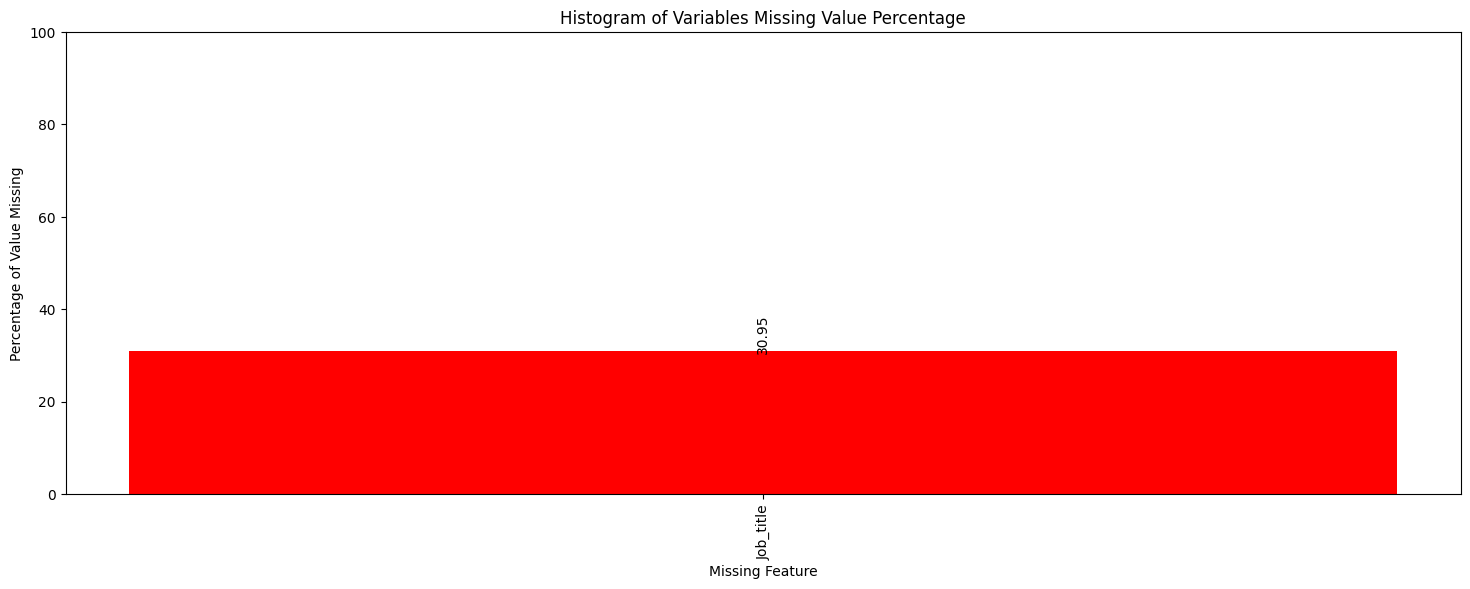

,index,Miss_Values,Miss_Rate,Available_Value
0,Job_title,9027,30.95,20138


In [7]:
tnv.Missing_Value_Analysis(df)

In [8]:
print(f'Duplicates in applications df: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')

Duplicates in applications df: 2786, (9.6%)


In [9]:
df.nunique()

ID                     29165
Gender                     2
Has_a_car                  2
Has_a_property             2
Children_count             9
Income                   259
Employment_status          5
Education_level            5
Marital_status             5
Dwelling                   6
Age                     6794
Employment_length       3483
Has_a_mobile_phone         1
Has-a_work_phone           2
Has_a_phone                2
Has_an_email               2
Job_title                 18
Family_member_count       10
Account_age               61
Is_high_risk               2
dtype: int64

In [10]:
df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df.shape

(26379, 20)

In [11]:
df['Job_title'].fillna(value='Other', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26379 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   26379 non-null  int64  
 1   Gender               26379 non-null  object 
 2   Has_a_car            26379 non-null  object 
 3   Has_a_property       26379 non-null  object 
 4   Children_count       26379 non-null  int64  
 5   Income               26379 non-null  float64
 6   Employment_status    26379 non-null  object 
 7   Education_level      26379 non-null  object 
 8   Marital_status       26379 non-null  object 
 9   Dwelling             26379 non-null  object 
 10  Age                  26379 non-null  int64  
 11  Employment_length    26379 non-null  int64  
 12  Has_a_mobile_phone   26379 non-null  int64  
 13  Has-a_work_phone     26379 non-null  int64  
 14  Has_a_phone          26379 non-null  int64  
 15  Has_an_email         26379 non-null  int6

In [12]:
df.drop('Has_a_mobile_phone', axis=1, inplace=True)

In [13]:
df

,ID,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employment_length,Has-a_work_phone,Has_a_phone,Has_an_email,Job_title,Family_member_count,Account_age,Is_high_risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,0,0,0,Core staff,2,-17,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,0,0,0,Accountants,2,-1,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,0,0,0,Laborers,4,-38,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,0,0,1,Managers,1,-11,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,0,1,0,Other,1,-41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29159,5091339,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11088,-1447,0,1,0,Cooking staff,2,-3,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,0,0,0,Core staff,3,-24,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,0,Managers,2,-29,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,0,1,0,Other,2,-37,0


In [14]:
start_df=pd.DataFrame(df.groupby(['ID'])['Account_age'].agg(min)).reset_index()
start_df['Account_age']=-start_df['Account_age']

In [15]:
df['AGE_YEARS']=-df['Age']/365.2425
df.drop('Age', axis=1, inplace=True)

In [16]:
df['UNEMPLOYED']=0
df.loc[-df['Employment_length']<0,'UNEMPLOYED']=1

In [17]:
df['YEARS_EMPLOYED']=-df['Employment_length']/365.2425
df.loc[df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
df.drop('Employment_length', axis=1, inplace=True)

In [18]:
df["Gender"] =  df["Gender"].replace(['F','M'],[0,1])
df["Has_a_car"] = df["Has_a_car"].replace(["Y","N"],[1,0])
df["Has_a_property"] = df["Has_a_property"].replace(["Y","N"],[1,0])

In [19]:
df = df.rename(columns=
               {'Has_a_car': 'OwnCar',
                'Has_a_property':'OwnProperty',
                'Children_count':'NumOfChildren',
                'Employment_status':'IncomeType',
                'Education_level':'EducationLevel',
                'Marital_status':'FamilyStatus',
                'Has-a_work_phone':'WorkPhone',
                'Has_a_phone':'Phone',
                'Has_an_email':'Email',
                'Job_title':'OccupationType',
                'Family_member_count':'NumOfFamilyMember',
                'Is_high_risk':'Risk_TargetVariable',
                'Account_age':'AccountActivateLength',
                'AGE_YEARS':'Age',
                'UNEMPLOYED':'UnemployedStatus',
                'YEARS_EMPLOYED':'YearsOfEmployed'})

In [20]:
df['NumOfFamilyMember']=df['NumOfFamilyMember'].astype(int)

In [21]:
df=df[['ID',
       'Gender',
       'Age',
       'UnemployedStatus',
       'YearsOfEmployed',  
       'OccupationType',
       'IncomeType',
       'Income',
       'EducationLevel',
       'Dwelling',
       'OwnCar',
       'OwnProperty', 
       'FamilyStatus',
       'NumOfChildren',
       'NumOfFamilyMember', 
       'AccountActivateLength',
       'WorkPhone',
       'Phone',
       'Email',
       'Risk_TargetVariable']]
     

In [22]:
df.to_csv('processed_dataset_train.csv',index=False)

In [23]:
df.columns

Index(['ID', 'Gender', 'Age', 'UnemployedStatus', 'YearsOfEmployed',
       'OccupationType', 'IncomeType', 'Income', 'EducationLevel', 'Dwelling',
       'OwnCar', 'OwnProperty', 'FamilyStatus', 'NumOfChildren',
       'NumOfFamilyMember', 'AccountActivateLength', 'WorkPhone', 'Phone',
       'Email', 'Risk_TargetVariable'],
      dtype='object')

In [24]:
df = data.encode(df)
df

,ID,Gender,Age,UnemployedStatus,YearsOfEmployed,OccupationType,IncomeType,Income,EducationLevel,Dwelling,OwnCar,OwnProperty,FamilyStatus,NumOfChildren,NumOfFamilyMember,AccountActivateLength,WorkPhone,Phone,Email,Risk_TargetVariable
0,5037048,1,44.548485,0,8.517629,3,4,135000.0,4,5,1,1,1,0,2,-17,0,0,0,0
1,5044630,0,27.734998,0,4.520284,0,0,135000.0,1,1,1,0,3,1,2,-1,0,0,0,0
2,5079079,0,35.102706,0,15.488340,8,0,180000.0,4,1,0,1,1,2,4,-38,0,0,0,0
3,5112872,0,57.301656,0,5.601758,10,0,360000.0,1,1,1,1,3,0,1,-11,0,0,1,0
4,5105858,0,44.373259,0,1.410022,12,4,270000.0,4,1,0,0,2,0,1,-41,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29159,5091339,0,30.357913,0,3.961751,2,0,135000.0,4,1,0,1,1,0,2,-3,0,1,0,0
29161,5029193,0,42.525172,0,22.604160,3,0,135000.0,4,1,0,1,1,1,3,-24,0,0,0,0
29162,5047710,0,48.685462,0,9.010452,10,4,76500.0,4,1,0,1,1,0,2,-29,1,1,0,0
29163,5009886,0,59.234618,1,0.000000,12,1,157500.0,4,1,0,1,0,0,2,-37,0,1,0,0


In [25]:
X_train, X_test, y_train, y_test = data.split(df)

In [26]:
train_score, test_score, models = data.model_evaluate(X_train, X_test, y_train, y_test)

model list is ['LogisticRegression', 'KNeighbors', 'SVC', 'DecisionTree', 'RandomForest']
for model LogisticRegression with the train_score:0.9809505757475241 and test_score:0.9835102350265352 
for model KNeighbors with the train_score:0.981993081552386 and test_score:0.9829416224412434 
for model SVC with the train_score:0.9809505757475241 and test_score:0.9835102350265352 
for model DecisionTree with the train_score:0.9989101075676444 and test_score:0.9668309325246399 
for model RandomForest with the train_score:0.9989101075676444 and test_score:0.981614859742229 


In [27]:
train_score

[0.9809505757475241,
 0.981993081552386,
 0.9809505757475241,
 0.9989101075676444,
 0.9989101075676444]

In [28]:
test_score

[0.9835102350265352,
 0.9829416224412434,
 0.9835102350265352,
 0.9668309325246399,
 0.981614859742229]